In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Input, Concatenate
from keras.layers import Conv2D, Conv2DTranspose, Activation, MaxPooling2D, UpSampling2D
from keras.layers.advanced_activations import PReLU, LeakyReLU
from keras.models import Model
from keras.models import load_model
import tensorflow as tf
from keras import backend as K
from keras.optimizers import Adam
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import glob
from keras import losses

Using TensorFlow backend.
/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
images = []
for i in glob.glob("*.jpg"):
    images.append(cv2.imread(i))

In [4]:
co = 0
rain_im = []
derain_im = []
for i in images:
    #print(co)
    co += 1
    col = i.shape[1]
    im = i[:,:col//2,:]
    im2 = i[:,col//2:,:]
    derain_im.append(im)
    rain_im.append(im2)

In [5]:
derain_final = []
for i in derain_im:
    x = cv2.resize(i,(256,256))
    x = x/255
    derain_final.append(x)

In [6]:
rain_final = []
for i in rain_im:
    x = cv2.resize(i,(256,256))
    x = x/255
    rain_final.append(x)

In [7]:
rain_final = np.asarray(rain_final)
rain_final.shape

(700, 256, 256, 3)

In [8]:
derain_final = np.asarray(derain_final)
derain_final.shape

(700, 256, 256, 3)

In [8]:
input_img = Input(shape=(256, 256, 3))

x = Conv2D(16, (4, 4), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (5, 5), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
#encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (5, 5), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid',padding = 'same')(x)

#decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.summary()
autoencoder.compile(optimizer='adam', loss=losses.mean_squared_error,metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 16)      784       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 64, 64, 32)        18464     
__________

In [25]:
Model.fit(autoencoder , rain_final, derain_final,epochs=150,shuffle=True,batch_size = 35)

Epoch 1/150
700/700 [==============================] - 13s - loss: 0.0074 - acc: 0.8143    
Epoch 2/150
700/700 [==============================] - 13s - loss: 0.0075 - acc: 0.8055    
Epoch 3/150
700/700 [==============================] - 13s - loss: 0.0077 - acc: 0.8044    
Epoch 4/150
700/700 [==============================] - 13s - loss: 0.0079 - acc: 0.8013    
Epoch 5/150
700/700 [==============================] - 13s - loss: 0.0078 - acc: 0.8060    
Epoch 6/150
700/700 [==============================] - 13s - loss: 0.0076 - acc: 0.8143    
Epoch 7/150
700/700 [==============================] - 13s - loss: 0.0075 - acc: 0.8121    
Epoch 8/150
700/700 [==============================] - 13s - loss: 0.0075 - acc: 0.8146    
Epoch 9/150
700/700 [==============================] - 13s - loss: 0.0078 - acc: 0.7884    
Epoch 10/150
700/700 [==============================] - 13s - loss: 0.0075 - acc: 0.8210    
Epoch 11/150
700/700 [==============================] - 13s - loss: 0.0081 - ac

In [39]:
autoencoder.save("./NNFL_FINAL_WEIGHTS")

In [10]:
auto = load_model("./NNFL_FINAL_WEIGHTS")


In [ ]:
a = h.predict(rain_final[:3])

In [11]:
aa = auto.predict(rain_final)

In [ ]:
plt.imshow(aa[0])

In [ ]:
plt.imshow(rain_final[0])

In [ ]:
x = rain_final[0]/255
x = x*255

In [ ]:
plt.imshow(x)

In [ ]:
x = np.rint(x)
x = x.astype(np.uint8)
x

In [ ]:
rain_final[0]

In [ ]:
plt.imshow(x)

In [43]:
mse = ((derain_final - aa) ** 2).mean(axis=None)

mse

In [44]:
mse

0.0066211531532070862

In [45]:
psnr = 20*np.log10(1/(mse**(1/2.0)))

In [46]:
psnr

21.79066366381867

In [13]:
x = aa[29]*255

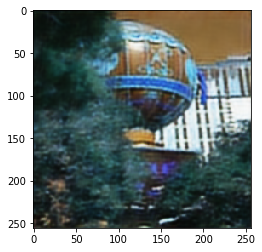

In [14]:
plt.imshow(x.astype(np.uint8))